In [1]:
%load_ext autoreload
%autoreload 1
%aimport resource_networks
%aimport network_manipulation 


from resource_networks import *
from network_manipulation import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
# import plotly.graph_objs as go
# import plotly.express as px

In [11]:
n = 7
G2 = ResourceDiGraph(nx.fast_gnp_random_graph(n, 0.2, directed=True))
sim = G2.run_simulation(np.random.randint(10, 13, size=n), 40)
plot_simulation(G2, sim)
# sim.arr

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

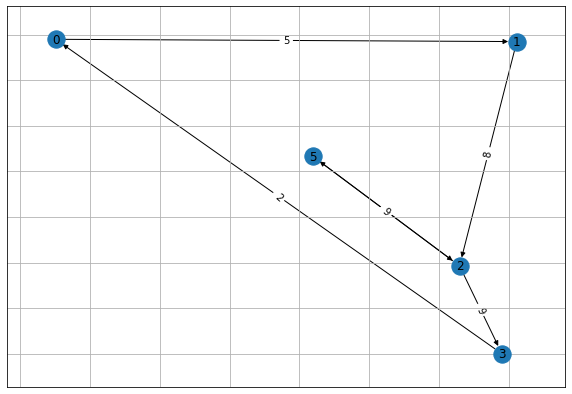

In [3]:
G1 = make_random_weights(nx.cycle_graph(4, create_using=nx.DiGraph))
G2 = make_random_weights(nx.cycle_graph(2, create_using=nx.DiGraph))
draw_weighted(nx.contracted_nodes(nx.disjoint_union(G1, G2), 2, 4))

In [10]:
G_2_cycles = ResourceDiGraph(nx.contracted_nodes(nx.disjoint_union(G1, G2), 2, 4))
st_arr = G_2_cycles.run_simulation([3, 3, 1, 2, 1], n_iters=100)
plot_simulation(G_2_cycles, st_arr)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=99), Output()), _dom_classes=('widg…

In [29]:
S1 = ResourceDiGraph()
S1.add_weighted_edges_from([(1, 2, 3), (2, 1, 4), (1, 1, 2)])
S1.run_simulation([3, 4], 2)

StateArray(node_descriptor={1: 0, 2: 1}, states_arr=array([[3. , 4. ],
       [5.2, 1.8]]), flow_arr=array([[[0. , 0. ],
        [0. , 0. ]],

       [[1.2, 1.8],
        [4. , 0. ]]]), total_output_res=[5, 4])

In [30]:
S2 = ResourceDiGraph()
S2.add_weighted_edges_from([(1, 2, 3), (2, 1, 2), (1, 1, 2)])
S2.run_simulation([3, 2], 2)

StateArray(node_descriptor={1: 0, 2: 1}, states_arr=array([[3. , 2. ],
       [3.2, 1.8]]), flow_arr=array([[[0. , 0. ],
        [0. , 0. ]],

       [[1.2, 1.8],
        [2. , 0. ]]]), total_output_res=[5, 2])

In [12]:
M = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [3, 1, 1, 1, 1],
    [4, 1, 1, 1, 1],
    [5, 1, 1, 1, 1]
])
G = ResourceDiGraph(nx.from_numpy_matrix(M, create_using=nx.DiGraph))
sim = G.run_simulation([0, 40, 0, 0, 0], 32)
plot_simulation(G, sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=31), Output()), _dom_classes=('widg…

In [28]:
G.stochastic_matrix()

array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.42857143, 0.14285714, 0.14285714, 0.14285714, 0.14285714],
       [0.5       , 0.125     , 0.125     , 0.125     , 0.125     ],
       [0.55555556, 0.11111111, 0.11111111, 0.11111111, 0.11111111]])

In [62]:
# .sum(axis=0) -- входящий поток
# .sum(axis=1) -- исходящий поток
display(sim.flow_arr[30])
sim.flow_arr[30].sum(axis=0) @ G.stochastic_matrix()

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.47531626, 0.47531626, 0.47531626, 0.47531626, 0.47531626],
       [1.01853485, 0.33951162, 0.33951162, 0.33951162, 0.33951162],
       [1.18829066, 0.29707266, 0.29707266, 0.29707266, 0.29707266],
       [1.32032295, 0.26406459, 0.26406459, 0.26406459, 0.26406459]])

array([5.00191994, 2.37610133, 2.37610133, 2.37610133, 2.37610133])

In [63]:
sim.flow_arr[31].sum(axis=0)

array([5.001427  , 2.37560839, 2.37560839, 2.37560839, 2.37560839])

In [70]:
sim.flow_arr[2]

array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.42857143, 0.14285714, 0.14285714, 0.14285714, 0.14285714],
       [0.5       , 0.125     , 0.125     , 0.125     , 0.125     ],
       [0.55555556, 0.11111111, 0.11111111, 0.11111111, 0.11111111]])

In [74]:
arr = np.array([[1, 2], 
                [3, 4]])
arr.sum(axis=1)

array([3, 7])

---

In [212]:
# # print(nx.nx_pydot.to_pydot(G).create_dot().decode('utf-8'))
# G_pd = nx.nx_pydot.to_pydot(G)
# # G_pd.set('fontsize', 4)
# G_pd.get_attributes()
# print(G_pd.create_dot().decode('utf-8'))
# # G_pd.create_dot()

G = nx.DiGraph()
G.add_edge('dsd', 1, weight=2, label='43')

G.graph['node'] = {'fontsize': 10}
# G.graph['edge'] = {'fontsize': 10}
# G.graph['rankdir'] = 'LR'

# G.remove_edge(0, 1)
# first(G.edges(data=True))[2].get('weight')
# G.nodes['dsd']['penwidth'] = 4
# G.nodes['dsd']['label'] = """<
# <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
#   <TR><TD ROWSPAN="3" BGCOLOR="yellow">class</TD></TR>
#   <TR><TD PORT="here" BGCOLOR="lightblue">qualifier</TD></TR>
# </TABLE>>"""
G.nodes['dsd']['shape'] = 'plaintext'
G.nodes['dsd']['label'] = f"""<<table>
                          <tr><td>{10}</td></tr>
                          <tr><td bgcolor='#00CC11'>B</td></tr>
                       </table>>
"""

G.nodes[1]['tooltip'] = 'lalalala'

G.nodes[1]['shape'] = 'circle'
G.nodes[1]['style'] = 'filled'
G.nodes[1]['fillcolor'] = '#f0fff4'
G.nodes[1]['fixedsize'] = True
# G.nodes[1]['fontsize'] = 10
G.nodes[1]['width'] = 0.35
G.nodes[1]['label'] = 123

G.edges['dsd', 1]['penwidth'] = 0.3
G.edges['dsd', 1]['arrowsize'] = 0.7
G.edges['dsd', 1]['fontsize'] = 10

# print(nx.nx_pydot.to_pydot(G).create_dot().decode('utf-8'))
SVG(nx.nx_pydot.to_pydot(G).create_svg())

#'color': 'transparent',
G.add_nodes_from([('lala', {'label': '', 'tooltip': ''})])
SVG(nx.nx_pydot.to_pydot(G).create_svg())

nx.nx_pydot.pydot_layout(G, prog='dot')

nx.draw(nx.fast_gnp_random_graph(8,0.2, directed=True))

G_ = nx.nx_pydot.to_pydot(G)
G_.set('rankdir', 'LR')
SVG(G_.create_svg())

play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

---